<a href="https://colab.research.google.com/github/pearl-yu/twitch_project/blob/main/raid_data_exploration_5000_firstbatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/twitch_data

/content/drive/MyDrive/twitch_data


In [10]:
%ls

1013713136.mp4                  sample_streamer/
chat_df0.csv                    sentiments
chat_df.csv                     sentiments1
chat_features_womeaningful.csv  sentiments2
chats/                          sentiments3
data_vid_df_l.csv               sentiments4
features_vid_df_lag3.csv        sentiments5
features_vid_df_lag.csv         vid_df_wraid.csv
features_vid_df_lag_raid.csv    video_df_merge2.csv
raid/                           video_df_merge3.csv
raid_5000/                      video_df_merge3.gsheet
raid_df.csv                     video_df_merge.csv


In [ ]:
# just want to take a look at the chats containing raid information
chat_df = pd.read_csv('chat_df0.csv',lineterminator='\n',index_col=0) 
chat_df.head()

temp_table = chat_df[chat_df['messages'].str.contains('raid',na=False)]
temp_table

,video_url,timestamp,time_in_seconds,author_id,author_name,author_bio,messages
666,https://www.twitch.tv/videos/1619944979,1665355121824000,1188.124,238777489,Michael7461,NaN,"@mayraidensenpai, who said that KEKW"
3000,https://www.twitch.tv/videos/1619944979,1665357892701000,3959.001,40139265,Itzmochi808,Howzit everyone!! I am a variety streamer! 18+...,we out here raiding twitch con
5745,https://www.twitch.tv/videos/1619944979,1665363838449000,9904.749,100135110,StreamElements,Elevate your content with www.StreamElements.c...,craidfn - (1800 DPI) Apex: 1.1 / ADS 1.05 | Va...
6070,https://www.twitch.tv/videos/1619944979,1665364571655000,10637.955,635793543,GrayJune7,NaN,I'm afraid of that droplet on the top monkaW
16565,https://www.twitch.tv/videos/1610408161,1665015072860000,2107.160,447167204,rmaton89,NaN,@dalordraiden it was a joke but clout is like ...
...,...,...,...,...,...,...,...
225041,https://www.twitch.tv/videos/1591613035,1663259993856000,7586.156,424089063,alankbrr,NaN,!raid
225063,https://www.twitch.tv/videos/1591613035,1663260144079000,7736.379,142432529,iipan,NaN,!raid
225090,https://www.twitch.tv/videos/1591613035,1663260437669000,8029.969,733199350,kiboy1111,NaN,!raid
225210,https://www.twitch.tv/videos/1591613035,1663261861871000,9454.171,552536197,culprith,NaN,!raid


In [11]:
# to get the list of streamers in sample, also will later merge raid data into this
# from independent_variable_chat_exploration.ipynb output
features_vid_df_lag = pd.read_csv('features_vid_df_lag3.csv',lineterminator='\n',index_col=0) 
features_vid_df_lag.columns

Index(['user_id', 'video_id', 'video_url', 'num_messages', 'message_len',
       'video_id.1', 'num_messages_per_min', 'user_id.1', 'user_name',
       'duration_min', 'created_at', 'title', 'view_count', 'broadcaster_type',
       'broadcast_description', 'broadcaster_created_at',
       'avg_messages_per_min', 'video_url_lag', 'num_messages_lag',
       'message_len_lag', 'video_id_lag', 'num_messages_per_min_lag',
       'user_id_lag', 'user_name_lag', 'duration_min_lag', 'created_at_lag',
       'title_lag', 'view_count_lag', 'broadcaster_type_lag',
       'broadcast_description_lag', 'broadcaster_created_at_lag',
       'avg_messages_per_min_lag', 'time_after_last_stream',
       'time_after_last_stream_end', 'user_id_post', 'created_at_post',
       'time_till_next_stream', 'time_till_last_stream_afterend'],
      dtype='object')

In [12]:
print(features_vid_df_lag['video_url'].nunique())
print(features_vid_df_lag['user_id'].nunique())

1888
113


In [13]:
features_vid_df_lag.user_name.unique()

array(['BeyondTheSummit', 'EleeMoon', 'Spifeyy', 'JaiEazy', 'SmiteGame',
       'Nmplol', 'TaliaMar', 'teamfortresstv', 'Ziqoftw', 'J4CKIECHAN',
       'spoonkid', 'Phos', 'supertf', 'ElLeon', 'Aplfisher', 'Jack',
       'curvyllama', 'robeytech', 'kurtjmac', 'GaLm', 'amberwolf',
       'OccamsSabre', 'RememberTheBeat', 'SWOL', 'Waterdance',
       'SwixieThinks', 'Yosoykush', 'nosyy', 'DrasseL', 'botimegaming',
       'shroud', 'HollywoodBobLIVE', 'JERICHO', 'ewokttv', 'TBNRKenWorth',
       'Bricky', 'sheepsticked', 'CantaPerMe', 'BriggsADA', 'TeamVASH',
       'zoey', 'jdotb', 'Karna', 'PixelbyPixelStudios', 'deme',
       'AsmodaiTV', 'clout', 'DataDave', 'TaesungTao', 'BreakinSkullz',
       'LazyR1co', 'ZombieCleo', 'VERTiiGOGAMING', 'Benex', 'Evanit0',
       'Fuzzyness', 'JeffHoogland', 'littlebunny_x', 'AsianGuyStream',
       'kyootboss', 'Jaayy', 'glermz', 'okharry', 'VansamaOfficial',
       'Amplified', 'DoctorBenjy', 'Onisuna', 'tcTekk', 'bractionfps',
       'BOOSFER', '

## Parse raid data


In [14]:
import requests # to fetch the raw HTML from our page
import csv
from bs4 import BeautifulSoup # to extract just the information we are looking for

In [15]:
# reference 1: https://github.com/Vidito/webscraping_housing/blob/main/main.py
def get_data(soup_object):
    table = soup.find('table', class_="w-full rounded-lg bg-card")

    # scrapes the table head element
    outputHead = []
    for th in table.find_all('th'):  # find_all() function to find the elements we are looking for
        outputHead.append(th.text)  #write to a output list

    # traverses all the table rows
    outputRows = []
    for tr in table.find_all('tr'):
        tableColumns = tr.find_all('td')
        outputRow = []
        for tc in tableColumns:
            outputRow.append(tc.text.replace('\n', ''))
        outputRows.append(outputRow)

    return outputHead, outputRows

In [ ]:
# testing the code with one streamer
#with open("raid_VNCEOfficial.html") as fp:
#    soup = BeautifulSoup(fp, 'html.parser')
#
#outputHead, outputRows = get_data(soup)
#raid_df= pd.DataFrame(outputRows,columns=outputHead)[1:].set_index(outputHead[0])
#
#raid_df.head()

# I'm here!

In [22]:
%cd ..

/content/drive/MyDrive/twitch_data


In [21]:
import os

In [26]:
raid_file_list = []
dir_path = 'raid_5000'

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        raid_file_list.append(path)

In [ ]:
for i in range(len(raid_file_list)):
  try:
    with open('raid_5000/' + raid_file_list[i] ) as fp:
      soup = BeautifulSoup(fp, 'html.parser')
      outputHead, outputRows = get_data(soup)
    print(i)
    if i == 0:
      raid_df= pd.DataFrame(outputRows,columns=outputHead)[1:].set_index(outputHead[0])
      print(raid_df.Whom.unique(),len(raid_df))
    else:
      temp = pd.DataFrame(outputRows,columns=outputHead)[1:].set_index(outputHead[0])
      raid_df = raid_df.append(temp)
      print(temp.Whom.unique(),len(temp))
  except:
    pass

In [29]:
# string to datetime format
raid_df['timestamp'] = pd.to_datetime(raid_df['Date'].str.strip(), format='%b %d, %Y at %H:%M')
raid_df['user_name'] = raid_df['Whom'].str.strip()
raid_df['num_raiders'] = raid_df['Number of viewers'].str.extract('(\d+)').astype(int)

raid_df_clean = raid_df.drop(['Stream','Date','Whom','Number of viewers'], axis=1)

In [30]:
raid_df_clean.head()
print(raid_df_clean.shape)

(14323, 5)


In [31]:
raid_df_clean.head()

,Channel,Raided/Hosted,timestamp,user_name,num_raiders
,,,,,
1,Smashley,raided,2022-11-27 18:34:00,BadNewsBaron,15
2,DeejayKnight,raided,2022-10-14 19:09:00,BadNewsBaron,76
3,Smashley,raided,2022-10-14 19:09:00,BadNewsBaron,90
4,Javihara,raided,2022-09-17 23:49:00,BadNewsBaron,3
5,TutorialSnakeLIVE,raided,2022-09-17 23:26:00,BadNewsBaron,7


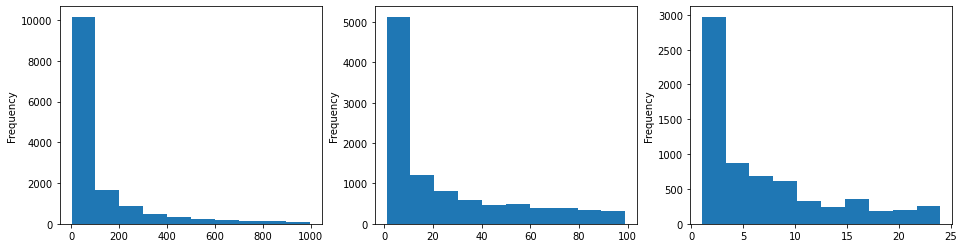

In [32]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 4]
plt.subplot(1,3,1)
raid_df_clean.num_raiders.plot.hist()
plt.subplot(1,3,2)
raid_df_clean[raid_df_clean.num_raiders <100].num_raiders.plot.hist()
plt.subplot(1,3,3)
raid_df_clean[raid_df_clean.num_raiders <25].num_raiders.plot.hist()

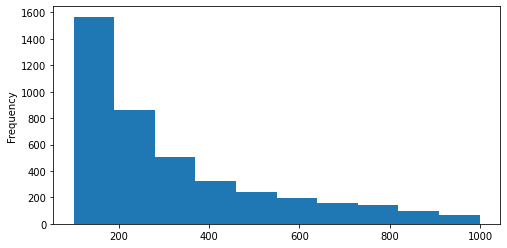

In [33]:
plt.rcParams['figure.figsize'] = [8, 4]
raid_df_clean[raid_df_clean.num_raiders >100].num_raiders.plot.hist()

In [34]:
# This saves to google drive directly
raid_df_clean.to_csv('raid_df3.csv')

## Towards identification

If incoming raids leads to exogenous change in viewership and chat intensity?

First let's take a look at the video level numbers. 
- Find the raids that happened during the video time range. 
- Then aggregate, Number of raids, total number of viewers raided. 

In [35]:
features_vid_df_lag['created_at'] = pd.to_datetime(features_vid_df_lag['created_at']).dt.tz_localize(None)
features_vid_df_lag['ended_at'] = features_vid_df_lag['created_at'] + pd.to_timedelta(features_vid_df_lag['duration_min'], unit='m') 

In [ ]:
#features_vid_df_lag.user_name
#raid_df.Whom.unique()

In [ ]:
#for i in range(2):
for i in range(len(features_vid_df_lag.user_name.unique())):
  streamer = features_vid_df_lag.user_name.unique()[i]
  temp_vid_table = features_vid_df_lag[features_vid_df_lag.user_name == streamer][['user_name','video_id','created_at','ended_at']]
  temp_raid_table = raid_df_clean[raid_df_clean['user_name'] == streamer]
  temp_raid_table = temp_raid_table.loc[(temp_raid_table['timestamp'] >= temp_vid_table['created_at'].min()) & (temp_raid_table['timestamp']<= temp_vid_table['created_at'].max())]
  print(temp_vid_table['user_name'].unique(),temp_raid_table.user_name.unique())
  
  temp = pd.merge(temp_vid_table, temp_raid_table,  how='left', left_on=['user_name'], right_on = ['user_name'])
  temp = temp[(temp['timestamp'] >= temp['created_at']) & (temp['timestamp'] <= temp['ended_at'])]

  if i ==0:
    vid_df_wraid = temp
    print(len(temp),len(vid_df_wraid))
  else: 
    vid_df_wraid = vid_df_wraid.append(temp)
    print(len(temp),len(vid_df_wraid))

vid_df_wraid = vid_df_wraid.reset_index(drop=True)

In [37]:
vid_df_wraid.to_csv('vid_df_wraid3.csv')

In [38]:
vid_df_wraid.head()

,user_name,video_id,created_at,ended_at,Channel,Raided/Hosted,timestamp,num_raiders
0,EleeMoon,1658366035,2022-11-20 19:41:38,2022-11-21 01:53:39.000000020,teahmo,raided,2022-11-20 21:20:00,1.0
1,EleeMoon,1652838106,2022-11-14 21:33:23,2022-11-14 23:13:23.000000000,Beddle,raided,2022-11-14 22:30:00,273.0
2,J4CKIECHAN,1660565824,2022-11-23 09:00:44,2022-11-23 15:52:03.999999980,omegaredsailor2,raided,2022-11-23 09:48:00,3.0
3,J4CKIECHAN,1659707718,2022-11-22 09:00:43,2022-11-22 16:33:13.000000000,babofat,raided,2022-11-22 15:26:00,24.0
4,J4CKIECHAN,1659707718,2022-11-22 09:00:43,2022-11-22 16:33:13.000000000,dariusviperx,raided,2022-11-22 14:22:00,2.0


In [39]:
raid_sum_df = vid_df_wraid.groupby('video_id')['num_raiders'].sum().reset_index()
features_vid_df_lag_raid = pd.merge(features_vid_df_lag, raid_sum_df,  how='left', left_on=['video_id'], right_on = ['video_id'])

In [40]:
features_vid_df_lag_raid['num_raiders'].fillna(0,inplace=True)
features_vid_df_lag_raid['num_raiders'] = features_vid_df_lag_raid['num_raiders']

In [41]:
raid_sum_df

,video_id,num_raiders
0,1605204445,7.0
1,1605730052,31.0
2,1605934225,443.0
3,1606636135,191.0
4,1607191709,10.0
...,...,...
348,1662718957,14.0
349,1662759419,85.0
350,1662810401,889.0
351,1662813140,491.0


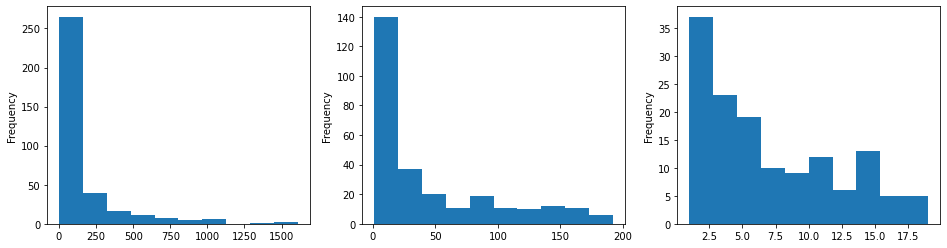

In [42]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 4]
plt.subplot(1,3,1)
raid_sum_df.num_raiders.plot.hist()
plt.subplot(1,3,2)
raid_sum_df[raid_sum_df.num_raiders <200].num_raiders.plot.hist()
plt.subplot(1,3,3)
raid_sum_df[raid_sum_df.num_raiders <20].num_raiders.plot.hist()

In [ ]:
# print(len(features_vid_df_lag),len(features_vid_df_lag_raid))

In [43]:
features_vid_df_lag_raid.isnull().sum()

user_id                            63
video_id                            0
video_url                           0
num_messages                        0
message_len                         0
video_id.1                          0
num_messages_per_min                0
user_id.1                          63
user_name                          63
duration_min                       63
created_at                         63
title                              63
view_count                         63
broadcaster_type                   71
broadcast_description             158
broadcaster_created_at             83
avg_messages_per_min               63
video_url_lag                     176
num_messages_lag                  176
message_len_lag                   176
video_id_lag                      176
num_messages_per_min_lag          176
user_id_lag                       176
user_name_lag                     176
duration_min_lag                  176
created_at_lag                    176
title_lag   

In [44]:
features_vid_df_lag_raid.to_csv('features_vid_df_lag_raid3.csv')

In [45]:
features_vid_df_lag_raid[['num_raiders','num_messages_per_min','num_messages','message_len','duration_min']].corr()

,num_raiders,num_messages_per_min,num_messages,message_len,duration_min
num_raiders,1.000000,0.059615,0.225975,-0.045855,0.183271
num_messages_per_min,0.059615,1.000000,0.707330,-0.238667,-0.010461
num_messages,0.225975,0.707330,1.000000,-0.227576,0.348038
message_len,-0.045855,-0.238667,-0.227576,1.000000,0.048602
duration_min,0.183271,-0.010461,0.348038,0.048602,1.000000


In [46]:
#temp = features_vid_df_lag_raid.drop(features_vid_df_lag_raid['num_raiders'].idxmax())
temp = features_vid_df_lag_raid[features_vid_df_lag_raid.num_raiders < features_vid_df_lag_raid.num_raiders.quantile(.99)]
temp[['num_raiders','view_count','num_messages_per_min','num_messages','message_len','duration_min']].corr()

,num_raiders,view_count,num_messages_per_min,num_messages,message_len,duration_min
num_raiders,1.000000,0.040523,-0.008803,0.115523,-0.019713,0.185056
view_count,0.040523,1.000000,0.432273,0.594084,-0.108670,0.160089
num_messages_per_min,-0.008803,0.432273,1.000000,0.713187,-0.234812,-0.015669
num_messages,0.115523,0.594084,0.713187,1.000000,-0.224616,0.336817
message_len,-0.019713,-0.108670,-0.234812,-0.224616,1.000000,0.055643
duration_min,0.185056,0.160089,-0.015669,0.336817,0.055643,1.000000


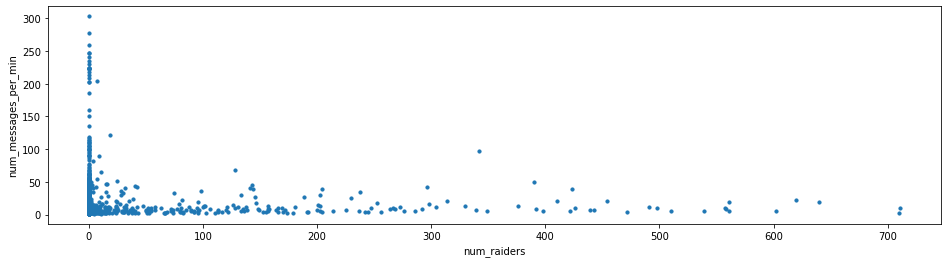

In [47]:
temp.plot.scatter(x = 'num_raiders', y = 'num_messages_per_min', s = 10);

In [48]:
#temp = features_vid_df_lag_raid.drop(features_vid_df_lag_raid['num_raiders'].idxmax())
temp = features_vid_df_lag_raid[features_vid_df_lag_raid.num_raiders < features_vid_df_lag_raid.num_raiders.quantile(.95)]
temp = temp[temp['num_raiders'] != 0 ]
temp[['num_raiders','view_count','num_messages_per_min','num_messages','message_len','duration_min']].corr()

,num_raiders,view_count,num_messages_per_min,num_messages,message_len,duration_min
num_raiders,1.000000,-0.041537,-0.011538,0.056258,-0.013178,0.051421
view_count,-0.041537,1.000000,0.224562,0.508789,-0.075152,0.363965
num_messages_per_min,-0.011538,0.224562,1.000000,0.755858,-0.346670,-0.044045
num_messages,0.056258,0.508789,0.755858,1.000000,-0.283128,0.353476
message_len,-0.013178,-0.075152,-0.346670,-0.283128,1.000000,0.173229
duration_min,0.051421,0.363965,-0.044045,0.353476,0.173229,1.000000


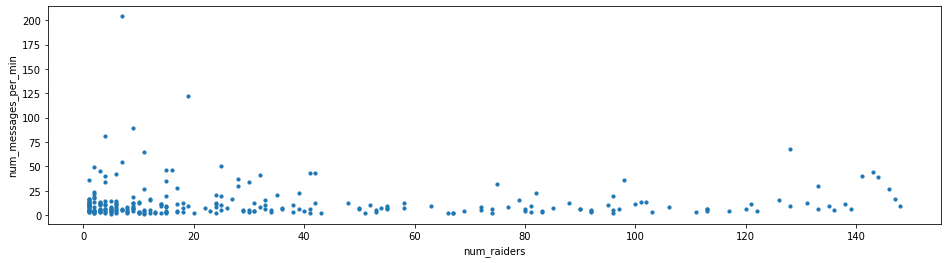

In [49]:
temp.plot.scatter(x = 'num_raiders', y = 'num_messages_per_min', s = 10);

In [50]:
#!pip install linearmodels
!pip install stargazer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
# econometrics in python: https://medium.com/@vince.shields913/econometrics-with-python-pt-4-20b7842f01df
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

est_df = features_vid_df_lag_raid

fml = 'num_messages_per_min ~ num_raiders '
reg1 = smf.ols(formula= fml, data=est_df).fit(cov_type = 'HC3')

fml = 'num_messages_per_min ~ num_raiders + np.log(view_count+1)'
reg2 = smf.ols(formula= fml, data=est_df).fit(cov_type = 'HC3')

fml = 'num_messages_per_min ~ num_raiders + np.log(view_count+1) '
reg3 = smf.ols(formula= fml, data=est_df).fit(cov_type = 'HC3')

stargazer = Stargazer([reg1, reg2,reg3])
HTML(stargazer.render_html())


## Ignore code down below

In [ ]:
raid_df['Date'][4]

'Oct 28, 2022 at 19:54'

In [ ]:
# makes a GET request to a URL and returns the text from that page.
def get_page(url):
    return requests.get(url).content

In [ ]:
page = get_page('https://streamscharts.com/tools/raid-finder/vnceofficial')
page

In [ ]:
soup = BeautifulSoup(page, 'html.parser') # parses the document using a HTML parser

In [ ]:
lists = soup.find_all('th')

In [ ]:
lists

In [ ]:
import re

In [ ]:
url = "raid_VNCEOOfficial.html"
page = open(url)

In [ ]:
page.text()

AttributeError: ignored

In [ ]:
soup = BeautifulSoup(page,'html.parser')

In [ ]:
print(table)

In [ ]:
header = table.find_all('th')

AttributeError: ignored

In [ ]:
print(table)

None


In [ ]:
soup